# Thinking about weights

Author: Junita Sirait

How to weigh my graph??

Table of contents:

1. [Reading file](#sub1)
2. [Co-occurences statistics](#sub2)
3. [Building contribution matrix](#sub3)

In [34]:
import json
import pandas as pd

from collections import Counter

from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np

<a id="sub1"></a>
## Reading file

In [2]:
with open("co_occurences.json", "r", encoding="utf-8") as infile:
    cc = json.load(infile)

<a id="sub2"></a>
## Co-occurences statistics

In [3]:
# occurences of the first news source
ns1o = pd.Series([cc[pair][0] for pair in cc])

In [4]:
# occurences of the second news source
ns2o = pd.Series([cc[pair][1] for pair in cc])

In [5]:
diffs = pd.Series([ns2o[i]-ns1o[i] for i in range(len(cc))])

In [6]:
ns1o.describe()

count    773570.000000
mean          1.327985
std           1.266513
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          96.000000
dtype: float64

In [7]:
ns2o.describe()

count    773570.000000
mean         12.009185
std          68.339979
min           1.000000
25%           1.000000
50%           2.000000
75%           5.000000
max        3237.000000
dtype: float64

In [8]:
diffs.describe()

count    773570.000000
mean         10.681200
std          68.262559
min           0.000000
25%           0.000000
50%           1.000000
75%           4.000000
max        3236.000000
dtype: float64

<a id="sub3"></a>
## Building weight distribution matrix

In [47]:
MAX_X = 3238 # max occurences of ns1 + 1
MAX_Y = 97   # max occurences of ns2 + 1

In [81]:
matrix = [[0 for i in range(MAX_X)] for i in range(MAX_Y)]
count = Counter()

In [83]:
for p in cc.values():
    # p is a tuple of cooccurences
    p1, p2 = p
    # print(p)
    matrix[p1][p2] += 1
    count[tuple(p)] += 1

In [55]:
print([max(row) for row in matrix])

[0, 221646, 22364, 4911, 1971, 678, 204, 131, 88, 62, 49, 9, 24, 9, 18, 4, 12, 11, 8, 2, 2, 5, 3, 3, 5, 4, 1, 4, 1, 2, 0, 1, 2, 2, 4, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 3, 2, 0, 1, 1, 1, 0, 4, 1, 0, 2, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2]


In [56]:
matrix[1][1]

221646

In [58]:
matrix[2][2]

22364

In [62]:
matrix[3][4]

4911

In [64]:
len(cc)

773570

We can see that there are a lot of co-occurences with one news source occuring only once. Let's define a relationship as meaningful if each of the news source in a pair occurs at least 5 times.

In [114]:
meaningful = [k for k in count.most_common() if k[0][0]>10 and k[0][1]>10]
meaningful[:5]

[((12, 14), 24),
 ((12, 17), 20),
 ((12, 18), 19),
 ((14, 17), 18),
 ((12, 16), 16)]

In [121]:
pd.Series([p[0][0] for p in meaningful]).describe()

count    623.000000
mean      23.913323
std       18.659210
min       11.000000
25%       14.000000
50%       17.000000
75%       24.000000
max       96.000000
dtype: float64

In [122]:
pd.Series([p[0][1] for p in meaningful]).describe()

count     623.000000
mean      120.922953
std       195.800329
min        11.000000
25%        34.000000
50%        57.000000
75%       103.500000
max      2572.000000
dtype: float64

In [127]:
ratio = pd.Series([p[0][0]/p[0][1] for p in meaningful])
ratio.describe()

count    623.000000
mean       0.415905
std        0.277726
min        0.006610
25%        0.185287
50%        0.358974
75%        0.636063
max        1.000000
dtype: float64

(array([94., 77., 98., 64., 62., 56., 53., 47., 32., 40.]),
 array([0.00660964, 0.10594868, 0.20528771, 0.30462675, 0.40396579,
        0.50330482, 0.60264386, 0.70198289, 0.80132193, 0.90066096,
        1.        ]),
 <BarContainer object of 10 artists>)

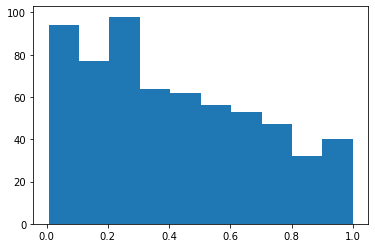

In [128]:
plt.hist(ratio)

In [129]:
sum([p[1] for p in meaningful])

1371

In [130]:
maxx = max([k[0][0] for k in meaningful])
maxy = max([k[0][1] for k in meaningful])
print(f"{maxx}, {maxy}")

96, 2572


In [136]:
mmatrix = [[0 for i in range(maxx+1)] for i in range(maxy+1)]
for p in meaningful:
    # p is a tuple of cooccurences
    pair, num = p
    # print(p)
    mmatrix[pair[1]][pair[0]] += num #pair[0]/pair[1]

<a id="sub4"></a>
# Co-occurence distribution matrix heatmap

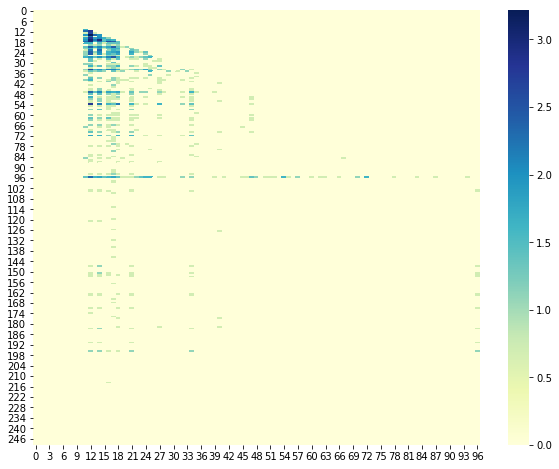

In [140]:
plt.figure(figsize = (10,8))
# ax = sns.heatmap(np.log(np.array(matrix)+1), cmap="YlGnBu", vmin=1, vmax=4)
ax = sns.heatmap(np.log(np.array(mmatrix[:250])+1), cmap="YlGnBu") #, vmin=1, vmax=4)

# plt.show()

In [38]:
print([max(row) for row in matrix])

[0, 221646, 22364, 4911, 1971, 678, 204, 131, 88, 62, 49, 9, 24, 9, 18, 4, 12, 11, 8, 2, 2, 5, 3, 3, 5, 4, 1, 4, 1, 2, 0, 1, 2, 2, 4, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 3, 2, 0, 1, 1, 1, 0, 4, 1, 0, 2, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,